<a href="https://colab.research.google.com/github/PHAN10M5/artificial_intelligence/blob/main/Cat_Dog_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!kaggle datasets download -d tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 99% 216M/218M [00:02<00:00, 111MB/s]
100% 218M/218M [00:02<00:00, 99.8MB/s]


In [ ]:
!unzip cat-and-dog.zip


Streaming output truncated to the last 5000 lines.
  inflating: training_set/training_set/cats/cat.3704.jpg  
  inflating: training_set/training_set/cats/cat.3705.jpg  
  inflating: training_set/training_set/cats/cat.3706.jpg  
  inflating: training_set/training_set/cats/cat.3707.jpg  
  inflating: training_set/training_set/cats/cat.3708.jpg  
  inflating: training_set/training_set/cats/cat.3709.jpg  
  inflating: training_set/training_set/cats/cat.371.jpg  
  inflating: training_set/training_set/cats/cat.3710.jpg  
  inflating: training_set/training_set/cats/cat.3711.jpg  
  inflating: training_set/training_set/cats/cat.3712.jpg  
  inflating: training_set/training_set/cats/cat.3713.jpg  
  inflating: training_set/training_set/cats/cat.3714.jpg  
  inflating: training_set/training_set/cats/cat.3715.jpg  
  inflating: training_set/training_set/cats/cat.3716.jpg  
  inflating: training_set/training_set/cats/cat.3717.jpg  
  inflating: training_set/training_set/cats/cat.3718.jpg  
  infl

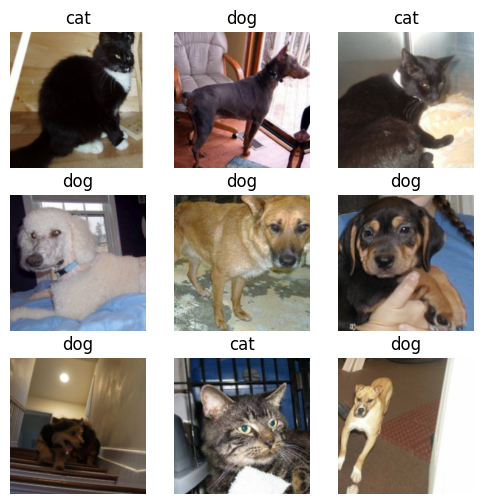

In [ ]:
from fastai.vision.all import *

# Define the path to your dataset (update this to your actual path)
path = Path("/content/training_set/training_set")  # Update this to the folder containing the data

cat_files = get_image_files(path/'cats')[:500]  # First 500 images of cats
dog_files = get_image_files(path/'dogs')[:500]  # First 500 images of dogs

# Combine the limited dataset
files = cat_files + dog_files

# Custom label function: Label the images based on file path
def label_func(f):
    return 'dog' if 'dog' in f.name.lower() else 'cat'

dls = ImageDataLoaders.from_path_func(
    path,            # Root path
    files,           # Limited subset of images
    label_func,      # Labeling function
    item_tfms=Resize(224),      # Resize all images to 224x224
    batch_tfms=aug_transforms() # Augmentations
)

dls.show_batch(max_n=9, figsize=(6, 6))


In [ ]:
learn = vision_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(3)  # Fine-tune for 3 epochs

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 106MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,0.496927,0.025674,0.990000,04:45


epoch,train_loss,valid_loss,accuracy,time
0,0.083970,0.014551,0.990000,06:58
1,0.067865,0.039099,0.990000,06:56
2,0.052200,0.044963,0.980000,06:55


Predicted: cat, Probability: 1.0000


<Axes: >

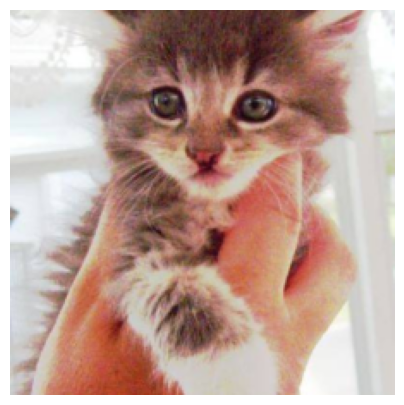

In [ ]:
from PIL import Image

# Replace 'path/to/your/image.jpg' with the path to your test image
img = Image.open("/content/training_set/training_set/cats/cat.100.jpg").convert('RGB')

img = PILImage.create(img)

img = Resize(224)(img)

pred, _, probs = learn.predict(img)
print(f"Predicted: {pred}, Probability: {probs.max():.4f}")
img.show()